In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data_1 = pd.read_csv("/Users/patel/Downloads/mumbai.csv")
data_1

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,The Orchid Hotel Mumbai Vile Parle,4.0,Very Good,5593,5.0,Near Mumbai Airport,T1 - Chhatrapati Shivaji International Airport,930 m,"6,499",780
1,Trident Bandra Kurla,4.6,Excellent,4987,5.0,Bandra Kurla Complex,T1 - Chhatrapati Shivaji International Airport,7.8 km,"8,750",NaN
2,ITC Grand Central - A Luxury Collection Hotel,4.5,Excellent,2445,5.0,South Mumbai,Cooper hospital,620 m,"14,000",NaN
3,IRA By Orchid Mumbai ( VITS Mumbai),3.9,Very Good,4707,4.0,Near Mumbai Airport,T2 - Chhatrapati Shivaji International Airport,2.3 km,"5,099",612
4,Trident Nariman Point,4.6,Excellent,5563,5.0,Marine Drive,Queen's Necklace - Marine Drive,470 m,"11,250",NaN
...,...,...,...,...,...,...,...,...,...,...
96,Blossom Dormitory ( For Male and Female),3.6,Very Good,214,NaN,Sakinaka,T2 - Chhatrapati Shivaji International Airport,3.4 km,678,189
97,Comfort Inn Heritage,3.9,Very Good,963,4.0,South Mumbai,NaN,NaN,"4,743","1,122"
98,Hotel Planet Residency,3.8,Very Good,1064,3.0,Near Mumbai Airport,T1 - Chhatrapati Shivaji International Airport,2.2 km,"3,726","1,028"
99,Hotel Kohinoor Elite,4.1,Very Good,2183,4.0,Near Mumbai Airport,T2 - Chhatrapati Shivaji International Airport,6.1 km,"7,250",NaN


In [3]:
data_1.describe(include='all')

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
count,101,101.00000,101,101.000000,86.000000,101,93,93,101,66
unique,101,NaN,3,NaN,NaN,23,9,64,95,65
top,The Orchid Hotel Mumbai Vile Parle,NaN,Very Good,NaN,NaN,Near Mumbai Airport,T2 - Chhatrapati Shivaji International Airport,2.3 km,"9,000",495
freq,1,NaN,64,NaN,NaN,36,43,4,4,2
mean,NaN,4.00198,NaN,1854.603960,4.069767,NaN,NaN,NaN,NaN,NaN
std,NaN,0.38961,NaN,1654.309869,0.878377,NaN,NaN,NaN,NaN,NaN
min,NaN,3.10000,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.70000,NaN,738.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.00000,NaN,1401.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.30000,NaN,2306.000000,5.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
data_1.isnull().sum()

Hotel Name               0
Rating                   0
Rating Description       0
Reviews                  0
Star Rating             15
Location                 0
Nearest Landmark         8
Distance to Landmark     8
Price                    0
Tax                     35
dtype: int64

In [5]:
data_2 = data_1.copy()

In [9]:
Rating_Description_dummies = pd.get_dummies(data_2['Rating Description'],drop_first=True)
Rating_Description_dummies

,Good,Very Good
0,0,1
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
96,0,1
97,0,1
98,0,1
99,0,1


In [11]:
data_2 = pd.concat([data_2,Rating_Description_dummies],axis=1)

In [13]:
data_2 = data_2.drop('Rating Description',axis=1)
data_2

,Hotel Name,Rating,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax,Good,Very Good
0,The Orchid Hotel Mumbai Vile Parle,4.0,5593,5.0,Near Mumbai Airport,T1 - Chhatrapati Shivaji International Airport,930 m,"6,499",780,0,1
1,Trident Bandra Kurla,4.6,4987,5.0,Bandra Kurla Complex,T1 - Chhatrapati Shivaji International Airport,7.8 km,"8,750",NaN,0,0
2,ITC Grand Central - A Luxury Collection Hotel,4.5,2445,5.0,South Mumbai,Cooper hospital,620 m,"14,000",NaN,0,0
3,IRA By Orchid Mumbai ( VITS Mumbai),3.9,4707,4.0,Near Mumbai Airport,T2 - Chhatrapati Shivaji International Airport,2.3 km,"5,099",612,0,1
4,Trident Nariman Point,4.6,5563,5.0,Marine Drive,Queen's Necklace - Marine Drive,470 m,"11,250",NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,Blossom Dormitory ( For Male and Female),3.6,214,NaN,Sakinaka,T2 - Chhatrapati Shivaji International Airport,3.4 km,678,189,0,1
97,Comfort Inn Heritage,3.9,963,4.0,South Mumbai,NaN,NaN,"4,743","1,122",0,1
98,Hotel Planet Residency,3.8,1064,3.0,Near Mumbai Airport,T1 - Chhatrapati Shivaji International Airport,2.2 km,"3,726","1,028",0,1
99,Hotel Kohinoor Elite,4.1,2183,4.0,Near Mumbai Airport,T2 - Chhatrapati Shivaji International Airport,6.1 km,"7,250",NaN,0,1


In [14]:
location = data_2['Location'].value_counts()
location

Near Mumbai Airport      36
Andheri East             12
South Mumbai              7
Powai                     6
Juhu                      6
Goregaon                  5
Bandra Kurla Complex      4
South Mumbai              4
Churchgate                3
Colaba                    2
Jogeshwari East           2
Bandra West               2
Marine Drive              2
In Mumbai Airport         1
Khar West                 1
Chembur                   1
Vikhroli West             1
Ghatkopar West            1
Borivali West             1
Andheri West              1
Asalpha                   1
Madh                      1
Sakinaka                  1
Name: Location, dtype: int64

In [15]:
frequant_map = data_2['Location'].value_counts(normalize = True).to_dict()
frequant_map

{'Near Mumbai Airport ': 0.3564356435643564,
 'Andheri East ': 0.1188118811881188,
 'South Mumbai ': 0.06930693069306931,
 'Powai ': 0.0594059405940594,
 'Juhu ': 0.0594059405940594,
 'Goregaon ': 0.04950495049504951,
 'Bandra Kurla Complex ': 0.039603960396039604,
 'South Mumbai': 0.039603960396039604,
 'Churchgate ': 0.0297029702970297,
 'Colaba ': 0.019801980198019802,
 'Jogeshwari East ': 0.019801980198019802,
 'Bandra West ': 0.019801980198019802,
 'Marine Drive ': 0.019801980198019802,
 'In Mumbai Airport ': 0.009900990099009901,
 'Khar West ': 0.009900990099009901,
 'Chembur': 0.009900990099009901,
 'Vikhroli West ': 0.009900990099009901,
 'Ghatkopar West ': 0.009900990099009901,
 'Borivali West': 0.009900990099009901,
 'Andheri West ': 0.009900990099009901,
 'Asalpha ': 0.009900990099009901,
 'Madh': 0.009900990099009901,
 'Sakinaka ': 0.009900990099009901}

In [16]:
data_3 = data_2.copy()

In [17]:
data_3['Location_frequantly_encoded'] = data_3['Location'].map(frequant_map)

In [18]:
data_3

,Hotel Name,Rating,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax,Good,Very Good,Location_frequantly_encoded
0,The Orchid Hotel Mumbai Vile Parle,4.0,5593,5.0,Near Mumbai Airport,T1 - Chhatrapati Shivaji International Airport,930 m,"6,499",780,0,1,0.356436
1,Trident Bandra Kurla,4.6,4987,5.0,Bandra Kurla Complex,T1 - Chhatrapati Shivaji International Airport,7.8 km,"8,750",NaN,0,0,0.039604
2,ITC Grand Central - A Luxury Collection Hotel,4.5,2445,5.0,South Mumbai,Cooper hospital,620 m,"14,000",NaN,0,0,0.069307
3,IRA By Orchid Mumbai ( VITS Mumbai),3.9,4707,4.0,Near Mumbai Airport,T2 - Chhatrapati Shivaji International Airport,2.3 km,"5,099",612,0,1,0.356436
4,Trident Nariman Point,4.6,5563,5.0,Marine Drive,Queen's Necklace - Marine Drive,470 m,"11,250",NaN,0,0,0.019802
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Blossom Dormitory ( For Male and Female),3.6,214,NaN,Sakinaka,T2 - Chhatrapati Shivaji International Airport,3.4 km,678,189,0,1,0.009901
97,Comfort Inn Heritage,3.9,963,4.0,South Mumbai,NaN,NaN,"4,743","1,122",0,1,0.039604
98,Hotel Planet Residency,3.8,1064,3.0,Near Mumbai Airport,T1 - Chhatrapati Shivaji International Airport,2.2 km,"3,726","1,028",0,1,0.356436
99,Hotel Kohinoor Elite,4.1,2183,4.0,Near Mumbai Airport,T2 - Chhatrapati Shivaji International Airport,6.1 km,"7,250",NaN,0,1,0.356436


In [19]:
data_4 = data_3.copy()

In [20]:
data_4 = data_4.drop('Location',axis=1)

In [21]:
data_4.head()

,Hotel Name,Rating,Reviews,Star Rating,Nearest Landmark,Distance to Landmark,Price,Tax,Good,Very Good,Location_frequantly_encoded
0,The Orchid Hotel Mumbai Vile Parle,4.0,5593,5.0,T1 - Chhatrapati Shivaji International Airport,930 m,"6,499",780,0,1,0.356436
1,Trident Bandra Kurla,4.6,4987,5.0,T1 - Chhatrapati Shivaji International Airport,7.8 km,"8,750",NaN,0,0,0.039604
2,ITC Grand Central - A Luxury Collection Hotel,4.5,2445,5.0,Cooper hospital,620 m,"14,000",NaN,0,0,0.069307
3,IRA By Orchid Mumbai ( VITS Mumbai),3.9,4707,4.0,T2 - Chhatrapati Shivaji International Airport,2.3 km,"5,099",612,0,1,0.356436
4,Trident Nariman Point,4.6,5563,5.0,Queen's Necklace - Marine Drive,470 m,"11,250",NaN,0,0,0.019802


In [22]:
data_4 = data_4.drop(['Tax','Hotel Name'],axis=1)

In [23]:
data_4.head()

,Rating,Reviews,Star Rating,Nearest Landmark,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded
0,4.0,5593,5.0,T1 - Chhatrapati Shivaji International Airport,930 m,"6,499",0,1,0.356436
1,4.6,4987,5.0,T1 - Chhatrapati Shivaji International Airport,7.8 km,"8,750",0,0,0.039604
2,4.5,2445,5.0,Cooper hospital,620 m,"14,000",0,0,0.069307
3,3.9,4707,4.0,T2 - Chhatrapati Shivaji International Airport,2.3 km,"5,099",0,1,0.356436
4,4.6,5563,5.0,Queen's Necklace - Marine Drive,470 m,"11,250",0,0,0.019802


In [24]:
data_5 = data_4.copy()

In [25]:
data_5['Nearest Landmark'].value_counts()

T2 - Chhatrapati Shivaji International Airport    43
T1 - Chhatrapati Shivaji International Airport    34
Queen's Necklace - Marine Drive                    6
Gateway Of India Mumbai                            4
Band Stand                                         2
Cooper hospital                                    1
Tata memorial cancer hospital                      1
Siddhivinayak Temple                               1
Mumbai Central Bus Terminus                        1
Name: Nearest Landmark, dtype: int64

In [26]:
frequant_landmark = data_5['Nearest Landmark'].value_counts(normalize = True).to_dict()
frequant_landmark

{'T2 - Chhatrapati Shivaji International Airport': 0.46236559139784944,
 'T1 - Chhatrapati Shivaji International Airport': 0.3655913978494624,
 "Queen's Necklace - Marine Drive": 0.06451612903225806,
 'Gateway Of India Mumbai': 0.043010752688172046,
 'Band Stand': 0.021505376344086023,
 'Cooper hospital': 0.010752688172043012,
 'Tata memorial cancer hospital': 0.010752688172043012,
 'Siddhivinayak Temple': 0.010752688172043012,
 'Mumbai Central Bus Terminus': 0.010752688172043012}

In [27]:
data_6 = data_5.copy()

In [28]:
data_6['Landmark_encoded'] = data_6['Nearest Landmark'].map(frequant_landmark)

In [29]:
data_6.head()

,Rating,Reviews,Star Rating,Nearest Landmark,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
0,4.0,5593,5.0,T1 - Chhatrapati Shivaji International Airport,930 m,"6,499",0,1,0.356436,0.365591
1,4.6,4987,5.0,T1 - Chhatrapati Shivaji International Airport,7.8 km,"8,750",0,0,0.039604,0.365591
2,4.5,2445,5.0,Cooper hospital,620 m,"14,000",0,0,0.069307,0.010753
3,3.9,4707,4.0,T2 - Chhatrapati Shivaji International Airport,2.3 km,"5,099",0,1,0.356436,0.462366
4,4.6,5563,5.0,Queen's Necklace - Marine Drive,470 m,"11,250",0,0,0.019802,0.064516


In [30]:
data_6 = data_6.drop('Nearest Landmark',axis=1)

In [31]:
data_6.head()

,Rating,Reviews,Star Rating,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
0,4.0,5593,5.0,930 m,"6,499",0,1,0.356436,0.365591
1,4.6,4987,5.0,7.8 km,"8,750",0,0,0.039604,0.365591
2,4.5,2445,5.0,620 m,"14,000",0,0,0.069307,0.010753
3,3.9,4707,4.0,2.3 km,"5,099",0,1,0.356436,0.462366
4,4.6,5563,5.0,470 m,"11,250",0,0,0.019802,0.064516


In [32]:
data_6.isnull().sum()

Rating                          0
Reviews                         0
Star Rating                    15
Distance to Landmark            8
Price                           0
Good                            0
Very Good                       0
Location_frequantly_encoded     0
Landmark_encoded                8
dtype: int64

In [33]:
def convert_km_to_m(x):
  if isinstance(x, str):
     new_values = x.split(' ')
     if new_values[1]=='m':
        return float(new_values[0])
     elif new_values[1]=='km':
        return float(new_values[0])*1000

  else:
      return x

In [34]:
data_6['Distance to Landmark'] = data_6['Distance to Landmark'].apply(convert_km_to_m)

In [35]:
data_6.head()


,Rating,Reviews,Star Rating,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
0,4.0,5593,5.0,930.0,"6,499",0,1,0.356436,0.365591
1,4.6,4987,5.0,7800.0,"8,750",0,0,0.039604,0.365591
2,4.5,2445,5.0,620.0,"14,000",0,0,0.069307,0.010753
3,3.9,4707,4.0,2300.0,"5,099",0,1,0.356436,0.462366
4,4.6,5563,5.0,470.0,"11,250",0,0,0.019802,0.064516


In [36]:
data_6.describe()

,Rating,Reviews,Star Rating,Distance to Landmark,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
count,101.00000,101.000000,86.000000,93.000000,101.000000,101.000000,101.000000,93.000000
mean,4.00198,1854.603960,4.069767,3469.677419,0.079208,0.633663,0.162043,0.354376
std,0.38961,1654.309869,0.878377,2495.591962,0.271410,0.484206,0.148275,0.150779
min,3.10000,4.000000,3.000000,230.000000,0.000000,0.000000,0.009901,0.010753
25%,3.70000,738.000000,3.000000,1600.000000,0.000000,0.000000,0.039604,0.365591
50%,4.00000,1401.000000,4.000000,3100.000000,0.000000,1.000000,0.069307,0.365591
75%,4.30000,2306.000000,5.000000,5500.000000,0.000000,1.000000,0.356436,0.462366
max,4.80000,7303.000000,5.000000,9500.000000,1.000000,1.000000,0.356436,0.462366


In [37]:
data_6 = data_6.dropna(subset= ['Distance to Landmark'])

In [38]:
data_6 = data_6.reset_index(drop = True)

In [39]:
data_6

,Rating,Reviews,Star Rating,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
0,4.0,5593,5.0,930.0,"6,499",0,1,0.356436,0.365591
1,4.6,4987,5.0,7800.0,"8,750",0,0,0.039604,0.365591
2,4.5,2445,5.0,620.0,"14,000",0,0,0.069307,0.010753
3,3.9,4707,4.0,2300.0,"5,099",0,1,0.356436,0.462366
4,4.6,5563,5.0,470.0,"11,250",0,0,0.019802,0.064516
...,...,...,...,...,...,...,...,...,...
88,3.3,1154,3.0,1600.0,"4,205",1,0,0.356436,0.365591
89,3.6,214,NaN,3400.0,678,0,1,0.009901,0.462366
90,3.8,1064,3.0,2200.0,"3,726",0,1,0.356436,0.365591
91,4.1,2183,4.0,6100.0,"7,250",0,1,0.356436,0.462366


In [40]:
data_6.isnull().sum()

Rating                          0
Reviews                         0
Star Rating                    14
Distance to Landmark            0
Price                           0
Good                            0
Very Good                       0
Location_frequantly_encoded     0
Landmark_encoded                0
dtype: int64

In [41]:
data_6 = data_6.drop('Star Rating',axis=1)

In [42]:
data_7 = data_6.copy()

In [43]:
data_7

,Rating,Reviews,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
0,4.0,5593,930.0,"6,499",0,1,0.356436,0.365591
1,4.6,4987,7800.0,"8,750",0,0,0.039604,0.365591
2,4.5,2445,620.0,"14,000",0,0,0.069307,0.010753
3,3.9,4707,2300.0,"5,099",0,1,0.356436,0.462366
4,4.6,5563,470.0,"11,250",0,0,0.019802,0.064516
...,...,...,...,...,...,...,...,...
88,3.3,1154,1600.0,"4,205",1,0,0.356436,0.365591
89,3.6,214,3400.0,678,0,1,0.009901,0.462366
90,3.8,1064,2200.0,"3,726",0,1,0.356436,0.365591
91,4.1,2183,6100.0,"7,250",0,1,0.356436,0.462366


In [44]:
data_7['Price'] = data_7['Price'].str.replace(',','').astype(float)

In [45]:
data_7

,Rating,Reviews,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
0,4.0,5593,930.0,6499.0,0,1,0.356436,0.365591
1,4.6,4987,7800.0,8750.0,0,0,0.039604,0.365591
2,4.5,2445,620.0,14000.0,0,0,0.069307,0.010753
3,3.9,4707,2300.0,5099.0,0,1,0.356436,0.462366
4,4.6,5563,470.0,11250.0,0,0,0.019802,0.064516
...,...,...,...,...,...,...,...,...
88,3.3,1154,1600.0,4205.0,1,0,0.356436,0.365591
89,3.6,214,3400.0,678.0,0,1,0.009901,0.462366
90,3.8,1064,2200.0,3726.0,0,1,0.356436,0.365591
91,4.1,2183,6100.0,7250.0,0,1,0.356436,0.462366


In [46]:
data_7.describe(include='all')

,Rating,Reviews,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,4.000000,1896.978495,3469.677419,6077.559140,0.086022,0.612903,0.173853,0.354376
std,0.402438,1686.723077,2495.591962,4046.946131,0.281916,0.489726,0.148654,0.150779
min,3.100000,4.000000,230.000000,404.000000,0.000000,0.000000,0.009901,0.010753
25%,3.700000,738.000000,1600.000000,3224.000000,0.000000,0.000000,0.049505,0.365591
50%,4.000000,1406.000000,3100.000000,5583.000000,0.000000,1.000000,0.118812,0.365591
75%,4.300000,2353.000000,5500.000000,8500.000000,0.000000,1.000000,0.356436,0.462366
max,4.800000,7303.000000,9500.000000,27000.000000,1.000000,1.000000,0.356436,0.462366


C:\Users\patel\AppData\Local\Temp\ipykernel_2904\2350065959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_7['Price'])


<Axes: xlabel='Price', ylabel='Density'>

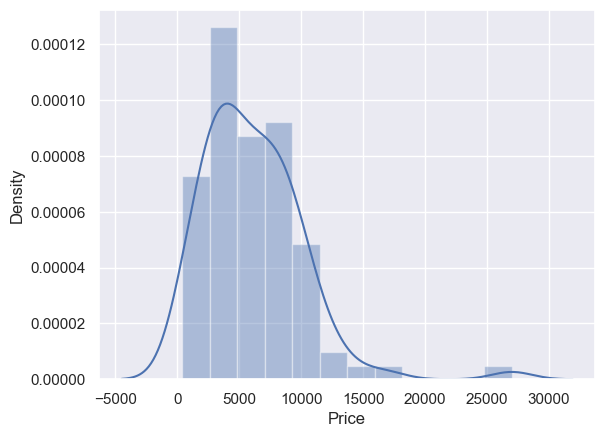

In [47]:
sns.distplot(data_7['Price'])

In [49]:
Log_price = np.log(data_7['Price'])


In [50]:
data_7['Log_price'] = Log_price

In [51]:
data_7

,Rating,Reviews,Distance to Landmark,Price,Good,Very Good,Location_frequantly_encoded,Landmark_encoded,Log_price
0,4.0,5593,930.0,6499.0,0,1,0.356436,0.365591,8.779404
1,4.6,4987,7800.0,8750.0,0,0,0.039604,0.365591,9.076809
2,4.5,2445,620.0,14000.0,0,0,0.069307,0.010753,9.546813
3,3.9,4707,2300.0,5099.0,0,1,0.356436,0.462366,8.536800
4,4.6,5563,470.0,11250.0,0,0,0.019802,0.064516,9.328123
...,...,...,...,...,...,...,...,...,...
88,3.3,1154,1600.0,4205.0,1,0,0.356436,0.365591,8.344030
89,3.6,214,3400.0,678.0,0,1,0.009901,0.462366,6.519147
90,3.8,1064,2200.0,3726.0,0,1,0.356436,0.365591,8.223091
91,4.1,2183,6100.0,7250.0,0,1,0.356436,0.462366,8.888757


In [53]:
data_8 = data_7.copy()

In [54]:
data_8 = data_8.drop('Price',axis=1)

C:\Users\patel\AppData\Local\Temp\ipykernel_2904\3688290399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_8['Log_price'])


<Axes: xlabel='Log_price', ylabel='Density'>

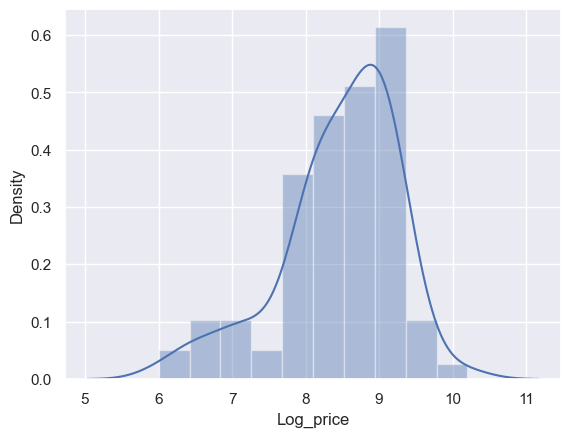

In [55]:
sns.distplot(data_8['Log_price'])

In [57]:
data_8.isnull().sum()

Rating                         0
Reviews                        0
Distance to Landmark           0
Good                           0
Very Good                      0
Location_frequantly_encoded    0
Landmark_encoded               0
Log_price                      0
dtype: int64

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_8[['Log_price','Distance to Landmark','Reviews']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [60]:
vif

,VIF,Features
0,5.381312,Log_price
1,3.056117,Distance to Landmark
2,2.611077,Reviews


In [62]:
target = data_8['Log_price']
inputs = data_8.drop('Log_price', axis=1)
inputs

,Rating,Reviews,Distance to Landmark,Good,Very Good,Location_frequantly_encoded,Landmark_encoded
0,4.0,5593,930.0,0,1,0.356436,0.365591
1,4.6,4987,7800.0,0,0,0.039604,0.365591
2,4.5,2445,620.0,0,0,0.069307,0.010753
3,3.9,4707,2300.0,0,1,0.356436,0.462366
4,4.6,5563,470.0,0,0,0.019802,0.064516
...,...,...,...,...,...,...,...
88,3.3,1154,1600.0,1,0,0.356436,0.365591
89,3.6,214,3400.0,0,1,0.009901,0.462366
90,3.8,1064,2200.0,0,1,0.356436,0.365591
91,4.1,2183,6100.0,0,1,0.356436,0.462366


In [63]:
inputs_1 = sm.add_constant(inputs)
results = sm.OLS(target, inputs.astype(float)).fit()

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Log_price   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2178.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                    6.32e-94
Time:                        08:20:49   Log-Likelihood:                         -89.933
No. Observations:                  93   AIC:                                      193.9
Df Residuals:                      86   BIC:                                      211.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Rating                          1.9511      0.051     38.086      0.000       1.849       2.053
Reviews                         0.0001   4.36e-05      2.860      0.005     3.8e-05       0.000
Distance to Landmark            0.0001   4.51e-05      3.111      0.003    5.07e-05       0.000
Good                            1.4624      0.263      5.565      0.000       0.940       1.985
Very Good                       0.5200      0.143      3.629      0.000       0.235       0.805
Location_frequantly_encoded     2.3564      0.776      3.037      0.003       0.814       3.899
Landmark_encoded               -2.6315      0.741     -3.552      0.001      -4.104      -1.159
==============================================================================
Omnibus:                       24.178   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.055
Skew:                          -1.178   Prob(JB):                     2.44e-08
Kurtosis:                       4.870   Cond. No.                     6.60e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
inputs = pd.DataFrame(inputs, dtype=float)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
scaler.fit(inputs)

StandardScaler()

In [69]:
input_scale = scaler.transform(inputs)

In [70]:
input_scale

array([[-2.21895532e-15,  2.20312056e+00, -1.02318117e+00,
        -3.06785996e-01,  7.94719414e-01,  1.23489358e+00,
         7.47847492e-02],
       [ 1.49899295e+00,  1.84189673e+00,  1.74459343e+00,
        -3.06785996e-01, -1.25830574e+00, -9.07988806e-01,
         7.47847492e-02],
       [ 1.24916079e+00,  3.26664075e-01, -1.14807348e+00,
        -3.06785996e-01, -1.25830574e+00, -7.07093583e-01,
        -2.29134304e+00],
       [-2.49832158e-01,  1.67499462e+00, -4.71237766e-01,
        -3.06785996e-01,  7.94719414e-01,  1.23489358e+00,
         7.20092328e-01],
       [ 1.49899295e+00,  2.18523819e+00, -1.20850524e+00,
        -3.06785996e-01, -1.25830574e+00, -1.04191896e+00,
        -1.93283883e+00],
       [ 2.49832158e-01,  2.72468963e+00, -8.74116165e-01,
        -3.06785996e-01,  7.94719414e-01,  1.23489358e+00,
         7.20092328e-01],
       [-7.49496475e-01,  2.05231259e+00, -6.83593670e-02,
        -3.06785996e-01,  7.94719414e-01, -3.72268210e-01,
         7.4784749

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scale, target, test_size=0.3)

In [72]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [73]:
y_hat = reg.predict(x_train)
y_hat

array([9.40340084, 7.93757516, 7.97509817, 8.61896325, 9.19484396,
       8.44271359, 8.90781526, 7.92889332, 9.32796437, 8.26262956,
       7.79819563, 8.69431612, 8.32254941, 7.52324784, 8.23738407,
       8.8653147 , 8.65681473, 8.10621624, 8.60835178, 8.7030074 ,
       8.4541397 , 8.14810406, 9.67824534, 8.65415761, 8.38084701,
       8.25440743, 9.15004229, 7.47673366, 7.82635432, 8.40323798,
       8.3489779 , 7.83207033, 7.09540095, 7.12589367, 8.82917542,
       7.5522179 , 8.56545181, 8.58218955, 8.54391695, 8.2194996 ,
       7.95999476, 9.73393889, 8.26865799, 8.03937237, 8.39866908,
       8.21986949, 8.68250038, 8.3992821 , 8.97949812, 8.3733809 ,
       8.95249303, 8.38435668, 8.43446134, 8.23606457, 9.77512789,
       9.82954888, 7.30933133, 7.36365699, 8.44164236, 7.93059004,
       8.50196093, 7.47572889, 8.60623038, 8.43927781, 8.88859097])

C:\Users\patel\AppData\Local\Temp\ipykernel_2904\673607322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


<Axes: xlabel='Log_price', ylabel='Density'>

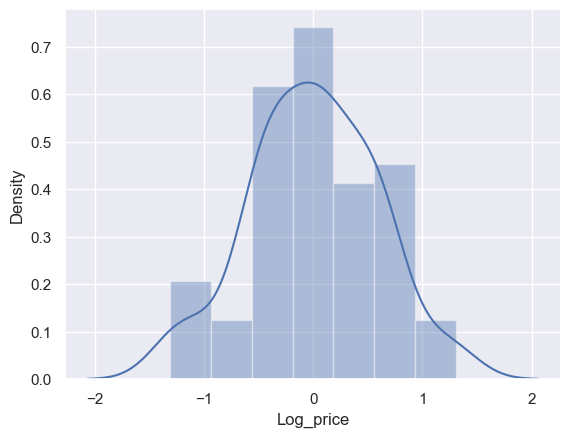

In [74]:
sns.distplot(y_train - y_hat)

Text(0, 0.5, 'Predictions(y_hat)')

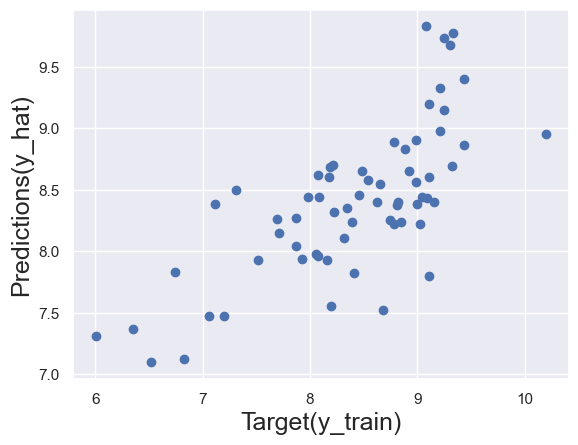

In [75]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target(y_train)',size=18)
plt.ylabel('Predictions(y_hat)', size = 18)

In [76]:
reg.score(x_train, y_train)

0.5254886266033079

In [77]:
reg.score(x_test, y_test)

-0.2646955847871504

In [78]:
train_errors = abs(y_hat - y_train)
print('Mean Absolute Error:', round(np.mean(train_errors), 2), 'degrees')

Mean Absolute Error: 0.46 degrees


In [79]:
train_map  = 100 * (train_errors/y_train)
train_accuracy = 100 - np.mean(train_map)
print('Accuracy:', round(train_accuracy, 2), '%.')

Accuracy: 94.36 %.


In [80]:
y_hat_test = reg.predict(x_test)

In [81]:
test_errors = abs(y_hat_test - y_test)
print('Mean Absolute Error:', round(np.mean(test_errors), 2), 'degrees')

Mean Absolute Error: 0.53 degrees


In [82]:
test_train_map  = 100 * (test_errors/y_test)
test_accuracy = 100 - np.mean(test_train_map)
print('Accuracy:', round(test_accuracy, 2), '%.')

Accuracy: 93.45 %.


Text(0, 0.5, 'Predictions(y_hat)')

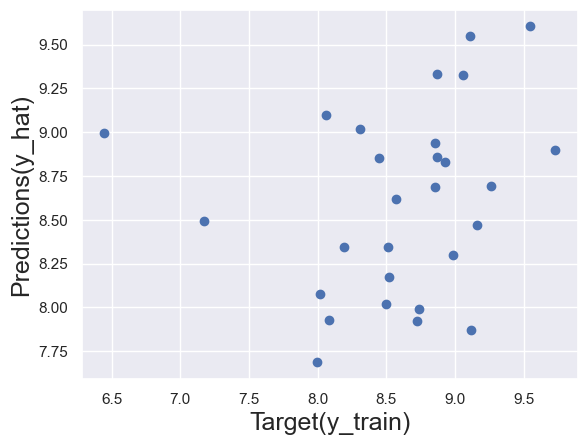

In [83]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Target(y_train)',size=18)
plt.ylabel('Predictions(y_hat)', size = 18)